In [1]:
import cv2

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
flags = [i for i in dir(cv2) if i.startswith('COLOR')]

In [5]:
len(flags)

295

In [6]:
flags[40]

'COLOR_BAYER_GR2BGRA'

In [7]:
planet = cv2.imread('./desktop/planet0.tif')

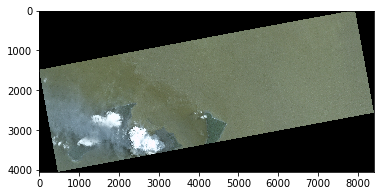

In [8]:
plt.imshow(planet)

In [9]:
planet2 = cv2.cvtColor(planet, cv2.COLOR_BGRA2RGBA)

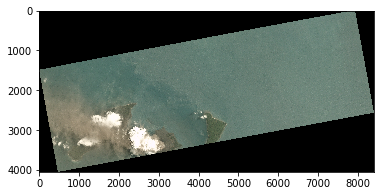

In [10]:
plt.imshow(planet2)

In [14]:
range1_lo = (140, 130, 105, 255)
range1_hi = (166, 152, 129, 255)
mask_range1 = cv2.inRange(planet2, range1_lo, range1_hi)

In [15]:
range2_lo = (201, 190, 175, 255)
range2_hi = (210, 200, 190, 255)
mask_range2 = cv2.inRange(planet2, range2_lo, range2_hi)

In [16]:
range3_lo = (165, 165, 150, 255)
range3_hi = (195, 185, 175, 255)
mask_range3 = cv2.inRange(planet2, range3_lo, range3_hi)

In [17]:
range4_lo = (155, 150, 140, 255)
range4_hi = (170, 160, 148, 255)
mask_range4 = cv2.inRange(planet2, range4_lo, range4_hi)

In [18]:
range5_lo = (145, 142, 130, 255)
range5_hi = (150, 147, 135, 255)
mask_range5 = cv2.inRange(planet2, range5_lo, range5_hi)

In [19]:
range6_lo = (127, 126, 115, 255)
range6_hi = (135, 128, 125, 255)
mask_range6 = cv2.inRange(planet2, range6_lo, range6_hi)

In [20]:
range7_lo = (121, 118, 114, 255)
range7_hi = (124, 123, 119, 255)
mask_range7 = cv2.inRange(planet2, range7_lo, range7_hi)

In [21]:
range8_lo = (190, 155, 130, 255)
range8_hi = (230, 195, 165, 255)
mask_range8 = cv2.inRange(planet2, range8_lo, range8_hi)

In [22]:
ash_mask = mask_range1 + mask_range2 + mask_range3 + mask_range4 + mask_range5 + mask_range6 + mask_range7 + mask_range8

In [23]:
ash_result = cv2.bitwise_and(planet2, planet2, mask=ash_mask)

<function matplotlib.pyplot.show(*args, **kw)>

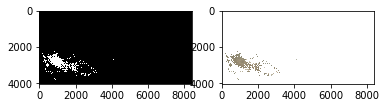

In [24]:
plt.subplot(1, 2, 1)
plt.imshow(ash_mask, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(ash_result)
plt.show

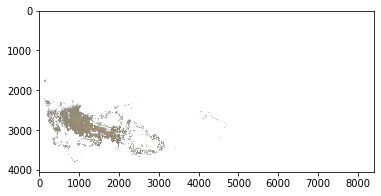

In [25]:
blur = cv2.GaussianBlur(ash_result, (7,7), 0)
plt.imshow(blur)
plt.show()

In [26]:
#Creates a tif file of the segmented ash cloud, w/white background
ash_result = cv2.cvtColor(ash_result, cv2.COLOR_BGRA2RGBA)
cv2.imwrite("ash_cloud_nored.tif", ash_result)

True

In [28]:
#Creates a tif file of the segmented ash cloud, highlighted red, w/white background
ash_result[ash_mask>0]=(0,0,255,255)
cv2.imwrite('ash_cloud.tif', ash_result)

True

In [33]:
#Creates a tif file of the segmented ash cloud, highlighted red, w/original background
planet[ash_mask>0]=(0,0,255)
cv2.imwrite("ash_cloud_wbackground.tif",planet)

True

In [7]:
path = "./desktop/planet"

planet_pics = []
for i in range(4):
    pic = cv2.cvtColor(cv2.imread(path + str(i) + ".tif"), cv2.COLOR_BGRA2RGBA)
    planet_pics.append(pic)

In [20]:
def segment_ash(image):
    ''' Attempts to segment the ash out of the provided image'''
    
    # Set the gray range 
    gray_lo = (153, 146, 137, 255)
    gray_hi = (219, 208, 195, 255)
    
    # Apply the gray mask
    mask_gray = cv2.inRange(image, gray_lo, gray_hi)
    
    # Set the brown range 
    brown_lo = (130, 130, 89, 255)
    brown_hi = (166, 152, 129, 255)
    
    # Apply the brown mask 
    mask_brown = cv2.inRange(image, brown_lo, brown_hi)
    
    light = (144, 144, 129, 255)
    dark = (150, 150, 140, 255)
    
    mask_light = cv2.inRange(image, light, dark)
    
    lo = (120, 119, 114, 255)
    hi = (124, 125, 120, 255)
    
    mask_lo = cv2.inRange(image, lo, hi)
    
    # Combine the two masks
    final_mask = mask_brown + mask_gray
    result = cv2.bitwise_and(image, image, mask=final_mask)
    
    # Clean up the segmentation using a blur
    blur = cv2.GaussianBlur(result, (7, 7), 0)
    return blur


In [21]:
results = [segment_ash(pic) for pic in planet_pics]

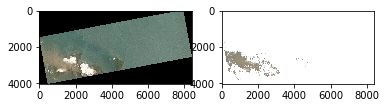

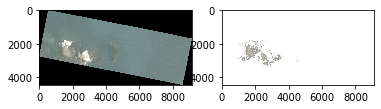

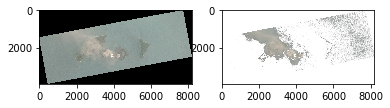

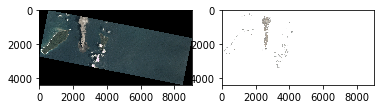

In [22]:
for i in range(0,4):
    plt.subplot(1, 2, 1)
    plt.imshow(planet_pics[i])
    plt.subplot(1, 2, 2)
    plt.imshow(results[i])
    plt.show()